In [1]:
from google.colab import files
uploaded = files.upload()


Saving MICS Lahore District Filtered Data.dta to MICS Lahore District Filtered Data.dta


In [290]:
import pandas as pd

# Replace the exact file name if different
df = pd.read_stata("MICS Lahore District Filtered Data.dta")

# Check first few rows
df.head()


<ipython-input-290-20b32920f7d9>:4: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata("MICS Lahore District Filtered Data.dta")


,HH1,HH2,ln,FS1,FS2,FS3,fsint,FS4,FS5,FS6,...,has_computer,has_mobile,has_bank_account,receives_remittances,ses_score,ses_level,exposed_to_any_hazard,women_felt_any_discrimination,men_felt_any_discrimination,owns_any_transport_asset
0,1235,1,8,1235,1,8,4206,3,4206,4201,...,1.0,1.0,1.0,0.0,4.0,Middle SES,NaN,0.0,NaN,1.0
1,1235,2,5,1235,2,5,4203,3,4203,4201,...,1.0,1.0,1.0,0.0,5.0,High SES,NaN,0.0,0.0,1.0
2,1235,3,4,1235,3,4,4205,3,4205,4201,...,1.0,1.0,1.0,0.0,5.0,High SES,NaN,0.0,NaN,1.0
3,1235,4,11,1235,4,11,4202,2,4202,4201,...,1.0,1.0,1.0,0.0,5.0,High SES,0.0,0.0,NaN,1.0
4,1235,9,8,1235,9,8,4205,2,4205,4201,...,1.0,1.0,1.0,1.0,6.0,High SES,NaN,NaN,NaN,1.0


In [291]:
cols_to_convert = [
    'woman_age',
    'child_hours_worked',
    'years_in_current_residence',
    'num_children_5to17',
    'school_starting_age',
    'sleeping_rooms_count',
    'age_of_child',
    'own_mobile_1',
    'women_highest_grade_wb',
    'men_highest_grade_mwb',
    'ses_score'  # double check this: it's likely a one-hot column, not original feature
]

# Convert them to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [292]:
df.columns.tolist()


['HH1',
 'HH2',
 'ln',
 'FS1',
 'FS2',
 'FS3',
 'fsint',
 'FS4',
 'FS5',
 'FS6',
 'FS7D',
 'FS7M',
 'FS7Y',
 'FS9',
 'FS10',
 'FS17',
 'FS8H',
 'FS8M',
 'FS11H',
 'FS11M',
 'FS12',
 'FS13',
 'FS14',
 'FS15',
 'fshint',
 'child_birth_month',
 'child_birth_year',
 'age_of_child',
 'CB4',
 'child_highest_level_cb',
 'child_highest_grade_cb',
 'CB6',
 'CB7',
 'child_edu_level_this_year',
 'child_grade_this_year',
 'CB9',
 'child_prev_year_level_cb',
 'child_prev_year_grade_cb',
 'has_health_insurance',
 'CB12A',
 'CB12B',
 'CB12C',
 'CB12D',
 'CB12X',
 'CB12NR',
 'child_worked_garden',
 'child_helped_familybiz',
 'child_produced_sold_goods',
 'child_income_activity',
 'child_hours_worked',
 'engaged_in_heavy_lifting',
 'engaged_in_danger_machinery_work',
 'CL6A',
 'CL6B',
 'CL6C',
 'CL6D',
 'CL6E',
 'CL6X',
 'fetched_water_past_week',
 'hours_fetching_water_past_week',
 'collected_firewood_past_week',
 'hrs_collect_firewood_past_week',
 'CL11A',
 'chores_cooking',
 'chores_cleaning_dishes'

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Columns: 1264 entries, HH1 to owns_any_transport_asset
dtypes: category(923), float32(14), float64(91), int16(12), int64(1), int8(32), object(191)
memory usage: 6.7+ MB


In [294]:
features = [
    'age_of_child',
    'relationship_to_head',
    'marital_status',
    'mother_alive',
    'mother_lives_in_household',
    'father_alive',
    'father_live_in_household',
    'woman_age',
    'years_in_current_residence',
    'previous_residence_location',
    'tuition_govt',
    'tuition_private',
    'child_worked_garden',
    'child_helped_familybiz',
    'child_produced_sold_goods',
    'child_income_activity',
    'child_hours_worked',
    'engaged_in_heavy_lifting',
    'engaged_in_danger_machinery_work',
    'fetched_water_past_week',
    'collected_firewood_past_week',
    'sleeping_rooms_count',
    'drinking_water_source',
    'non_drinking_water_source',
    'water_source_location',
    'toilet_facility_type',
    'chores_cooking',
    'chores_cleaning_dishes',
    'chores_washing_clothes',
    'chores_care_siblings',
    'chores_care_elderly',
    'discipline_took_away_privileges',
    'severe_physical_punishment_child',
    'belief_phys_punish_necessary',
    'freq_child_anxious',
    'homework_help_for_child',
    'attended_pta_meeting',
    'discussed_education_issues',
    'discussed_school_budget',
    'contacted_sch_officials',
    'child_reads_books',
    'someone_reads_to_child',
    'primary_home_language_child',
    'teacher_lang_used_inclass',
    'reads_newspaper_frequency',
    'ever_used_computer',
    'woman_ever_used_internet',
    'man_ever_used_internet',
    'own_mobile_1',
    'own_mobile_2',
    'has_computer',
    'has_internet',
    'has_mobile',
    'owns_any_transport_asset',
    'has_health_insurance',
    'has_bank_account',
    'receives_remittances',
    'wealthscore_combined',
    'working_abroad',
    'hh_remittance_received',
    'hh_cash_donation_received',
    'diff_see_with_glasses',
    'diff_seeing_general',
    'diff_hear_with_aid',
    'diff_hearing_general',
    'diff_communicate_language',
    'diff_remember_concentrate',
    'diff_walking_climbing',
    'diff_washing_dressing',
    'exposed_to_any_hazard',
    'women_felt_any_discrimination',
    'men_felt_any_discrimination',
    'suburban',
    'district',
    'division',
    'hh_mem_highest_level_ed',
    'num_children_5to17',
    'caretakerdis',
    'fsinsurance',
    'functional_difficulty',
    'school_starting_age',
    'tuition_religious',
    'tuition_other',
    'wears_hearing_aid',
    'disability',
    'insurance',
    'women_highest_grade_wb',
    'comp_tab_usage_3mo',
    'internet_usage_3mo_2',
    'mobile_use_3mo_2',
    'men_highest_grade_mwb',
    'internet_usage_3mo_1',
    'mobile_use_3mo_1',
]



In [295]:
 target = 'education_access'
 # Separate features and target variable
 X = df[features]
 y = df[target]


In [296]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [297]:
column_list = X.columns.tolist()
print(column_list)

['age_of_child', 'relationship_to_head', 'marital_status', 'mother_alive', 'mother_lives_in_household', 'father_alive', 'father_live_in_household', 'woman_age', 'years_in_current_residence', 'previous_residence_location', 'tuition_govt', 'tuition_private', 'child_worked_garden', 'child_helped_familybiz', 'child_produced_sold_goods', 'child_income_activity', 'child_hours_worked', 'engaged_in_heavy_lifting', 'engaged_in_danger_machinery_work', 'fetched_water_past_week', 'collected_firewood_past_week', 'sleeping_rooms_count', 'drinking_water_source', 'non_drinking_water_source', 'water_source_location', 'toilet_facility_type', 'chores_cooking', 'chores_cleaning_dishes', 'chores_washing_clothes', 'chores_care_siblings', 'chores_care_elderly', 'discipline_took_away_privileges', 'severe_physical_punishment_child', 'belief_phys_punish_necessary', 'freq_child_anxious', 'homework_help_for_child', 'attended_pta_meeting', 'discussed_education_issues', 'discussed_school_budget', 'contacted_sch_off

In [298]:
# Encode categorical variables
X = pd.get_dummies(X)


In [299]:
columns_to_drop = ['homework_help_for_child_no', 'caretakerdis_ No information']

# Make sure the columns exist to avoid KeyErrors
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns])


In [300]:
X = X.loc[:, ~X.columns.duplicated()]


In [301]:
# List of columns to drop (with "NO RESPONSE" or similar)
no_response_features = [
    'someone_reads_to_child_NO RESPONSE',
    'child_reads_books_NO RESPONSE',
    'years_in_current_residence_NO RESPONSE',
    'primary_home_language_child_NO RESPONSE',
    'fetched_water_past_week_NO RESPONSE',
    'child_produced_sold_goods_NO RESPONSE',
    'fsinsurance_Missing',
    'has_health_insurance_NO RESPONSE',
    'insurance_Missing',
    'belief_phys_punish_necessary_NO RESPONSE',
    'severe_physical_punishment_child_NO RESPONSE',
    'mobile_use_3mo_1_NO RESPONSE',
    'man_ever_used_internet_NO RESPONSE',
    'hh_cash_donation_received_dk',
    'chores_washing_clothes_NO RESPONSE',
    'child_helped_familybiz_NO RESPONSE',
    'tuition_religious_',
    'child_likes_reading_NO RESPONSE',
    'child_worked_garden_NO RESPONSE',
    'internet_usage_3mo_1_NO RESPONSE',
    'engaged_in_heavy_lifting_NO RESPONSE',
    'ever_used_computer_NO RESPONSE',
    'own_mobile_2_NO RESPONSE',
    'chores_cooking_NO RESPONSE',
    'previous_residence_location_NO RESPONSE/Place Name',
    'working_abroad_NO RESPONSE',
    'chores_cleaning_dishes_NO RESPONSE',
    'discipline_took_away_privileges_NO RESPONSE',
    'woman_ever_used_internet_NO RESPONSE'
]

# Drop these columns from DataFrame X
X = X.drop(columns=[col for col in no_response_features if col in X.columns])


In [302]:
column_list = X.columns.tolist()
print(column_list)

['age_of_child', 'woman_age', 'years_in_current_residence', 'child_hours_worked', 'sleeping_rooms_count', 'own_mobile_1', 'has_computer', 'has_internet', 'has_mobile', 'owns_any_transport_asset', 'has_bank_account', 'receives_remittances', 'wealthscore_combined', 'exposed_to_any_hazard', 'women_felt_any_discrimination', 'men_felt_any_discrimination', 'num_children_5to17', 'school_starting_age', 'women_highest_grade_wb', 'men_highest_grade_mwb', 'relationship_to_head_SPOUSE / WIFE', 'relationship_to_head_SON / DAUGHTER', 'relationship_to_head_SON-IN-LAW / DAUGHTER-IN-LAW', 'relationship_to_head_grandchild', 'relationship_to_head_BROTHER / SISTER', 'relationship_to_head_BROTHER-IN-LAW / SISTER-IN-LAW', 'relationship_to_head_NIECE / NEPHEW', 'relationship_to_head_OTHER RELATIVE', 'relationship_to_head_ADOPTED / FOSTER / STEPCHILD', 'relationship_to_head_SERVANT (LIVE-IN)', 'relationship_to_head_OTHER (NOT RELATED)', 'relationship_to_head_Inconsistent', 'marital_status_married', 'marital_s

In [303]:
column_list = X.columns.tolist()
print(column_list)

['age_of_child', 'woman_age', 'years_in_current_residence', 'child_hours_worked', 'sleeping_rooms_count', 'own_mobile_1', 'has_computer', 'has_internet', 'has_mobile', 'owns_any_transport_asset', 'has_bank_account', 'receives_remittances', 'wealthscore_combined', 'exposed_to_any_hazard', 'women_felt_any_discrimination', 'men_felt_any_discrimination', 'num_children_5to17', 'school_starting_age', 'women_highest_grade_wb', 'men_highest_grade_mwb', 'relationship_to_head_SPOUSE / WIFE', 'relationship_to_head_SON / DAUGHTER', 'relationship_to_head_SON-IN-LAW / DAUGHTER-IN-LAW', 'relationship_to_head_grandchild', 'relationship_to_head_BROTHER / SISTER', 'relationship_to_head_BROTHER-IN-LAW / SISTER-IN-LAW', 'relationship_to_head_NIECE / NEPHEW', 'relationship_to_head_OTHER RELATIVE', 'relationship_to_head_ADOPTED / FOSTER / STEPCHILD', 'relationship_to_head_SERVANT (LIVE-IN)', 'relationship_to_head_OTHER (NOT RELATED)', 'relationship_to_head_Inconsistent', 'marital_status_married', 'marital_s

In [304]:
duplicates = X.columns[X.columns.duplicated()]
print(duplicates)

Index([], dtype='object')


In [305]:
X = X[X.columns.drop(list(X.filter(regex='-1')))]

In [306]:
import numpy as np
np.seterr(all="ignore")  # Ignores divide-by-zero and invalid value warnings

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [307]:
from sklearn.preprocessing import MinMaxScaler
 # Assuming X is a pandas DataFrame
scaler = MinMaxScaler()
 # Convert the scaled array back to a DataFrame (optional)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
 # Calculate correlations
correlations = X.corrwith(y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [308]:
 # Convert correlations to a DataFrame for better printing
corr_df = pd.DataFrame(correlations.abs().sort_values(ascending=False), columns=['Correlation'])

In [309]:
 # Print all correlations
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(corr_df)

                                                    Correlation
wealthscore_combined                                   0.274541
teacher_lang_used_inclass_urdu                         0.193530
own_mobile_2_yes                                       0.182615
child_income_activity_yes                              0.167528
child_income_activity_no                               0.167528
toilet_facility_type_NO FACILITY / BUSH / FIELD        0.158018
mobile_use_3mo_2_ALMOST EVERY DAY                      0.157572
homework_help_for_child_yes                            0.155962
primary_home_language_child_urdu                       0.151988
child_reads_books_yes                                  0.145907
has_mobile                                             0.138969
engaged_in_danger_machinery_work_yes                   0.138298
own_mobile_2_no                                        0.137733
exposed_to_any_hazard                                  0.135787
has_bank_account                        

In [310]:
 # Filter for correlations with absolute value greater than 0.01
 selected_features = correlations[abs(correlations) >= 0.06].index
 print(len(X.columns))
 print(len(selected_features))

203
61


In [311]:
# Filter for correlations with absolute value greater than 0.05
 # Keep only the selected columns in X
X = X[selected_features]
print(len(X.columns))

61


In [312]:
# handling the missing values
missing_counts = X.isnull().sum()
thresh = 1000
cols_to_remove = missing_counts[missing_counts > thresh].index.tolist()
print(cols_to_remove)

['child_hours_worked', 'exposed_to_any_hazard', 'men_felt_any_discrimination', 'men_highest_grade_mwb']


In [313]:
X = X.drop(columns=cols_to_remove)

In [314]:
#encoding the catagorical variables
y = pd.get_dummies(y)

In [315]:
from sklearn.model_selection import train_test_split
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
import numpy as np

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [317]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [318]:
# # Initialize the Random Forest Classifier
#     # use all processors

# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=40,
#     min_samples_split=10,
#     min_samples_leaf=3,
#     random_state=42,
#     n_jobs=-1,
#      # Automatically adjusts based on class imbalance
# )

# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print a detailed classification report
# print(classification_report(y_test, y_pred))

# # Optionally, display the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)


In [319]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split

# # # If your original y is one-hot, convert to class labels before splitting
# # y_class = np.argmax(y, axis=1)

# # # Stratified split
# # X_train, X_test, y_train_raw, y_test_raw = train_test_split(
# #     X, y_class, test_size=0.2, random_state=42, stratify=y_class
# # )

# class_weight = {0: 10, 1: 1}  # start aggressive

# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=40,
#     min_samples_split=10,
#     min_samples_leaf=3,
#     random_state=42,
#     n_jobs=-1,
#     class_weight=class_weight
# )

rf_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=4,
    random_state=42,
    n_jobs=-1,
    class_weight={0: 10, 1: 1}  # moderate bias
)
rf_model.fit(X_train, y_train)

# # Train Random Forest with class_weight
# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=40,
#     min_samples_split=10,
#     min_samples_leaf=3,
#     random_state=42,
#     n_jobs=-1,
#     class_weight='balanced'
# )

# rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8547215496368039

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.87      0.46        30
           1       0.99      0.85      0.92       383

    accuracy                           0.85       413
   macro avg       0.65      0.86      0.69       413
weighted avg       0.94      0.85      0.88       413

Confusion Matrix:
 [[ 26   4]
 [ 56 327]]


                                              Feature  Importance
39                     teacher_lang_used_inclass_urdu    0.226653
7                                wealthscore_combined    0.135650
30                        homework_help_for_child_yes    0.067881
6                                    has_bank_account    0.059523
56                  mobile_use_3mo_2_ALMOST EVERY DAY    0.056074
43                                   own_mobile_2_yes    0.048085
0                                           woman_age    0.042706
36                         someone_reads_to_child_yes    0.038887
37                   primary_home_language_child_urdu    0.035376
35                              child_reads_books_yes    0.028948
31                           attended_pta_meeting_yes    0.024570
47                     hh_mem_highest_level_ed_higher    0.020054
45            hh_mem_highest_level_ed_LOWER SECONDARY    0.020021
16                           child_income_activity_no    0.017828
1         

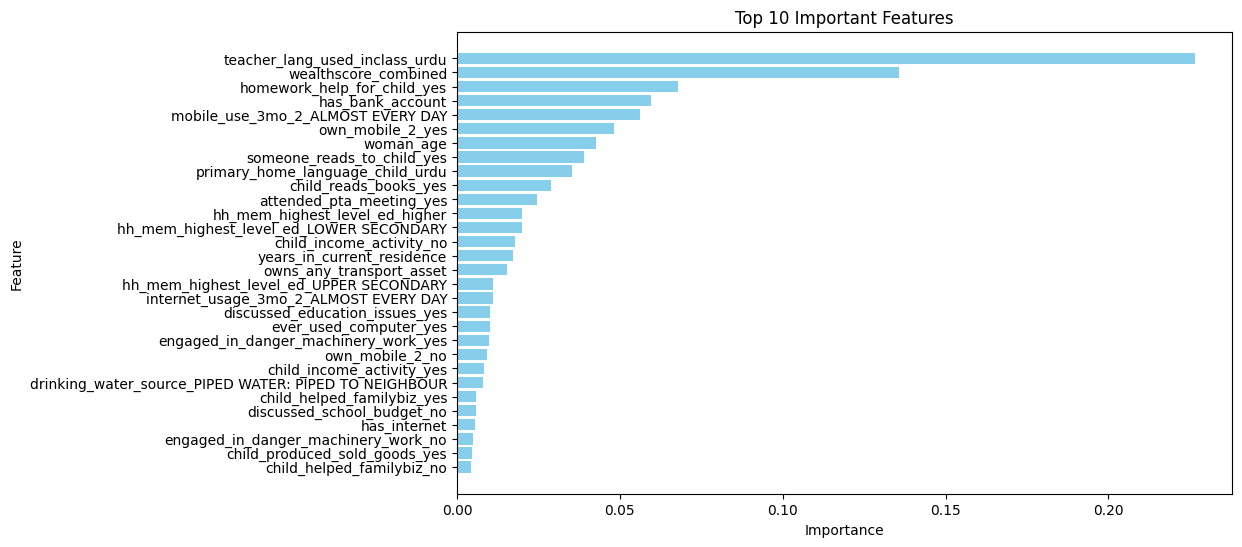

In [320]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Select top 30 features
top_30_features = feature_importance_df.head(30)

# Display top 30 features
print(top_30_features)



# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:30], feature_importance_df['Importance'][:30], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show top features on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()


In [321]:
import shap

Full SHAP values shape: (413, 57, 2)
SHAP values for class 1 shape: (413, 57)
Subset SHAP values shape: (300, 57)


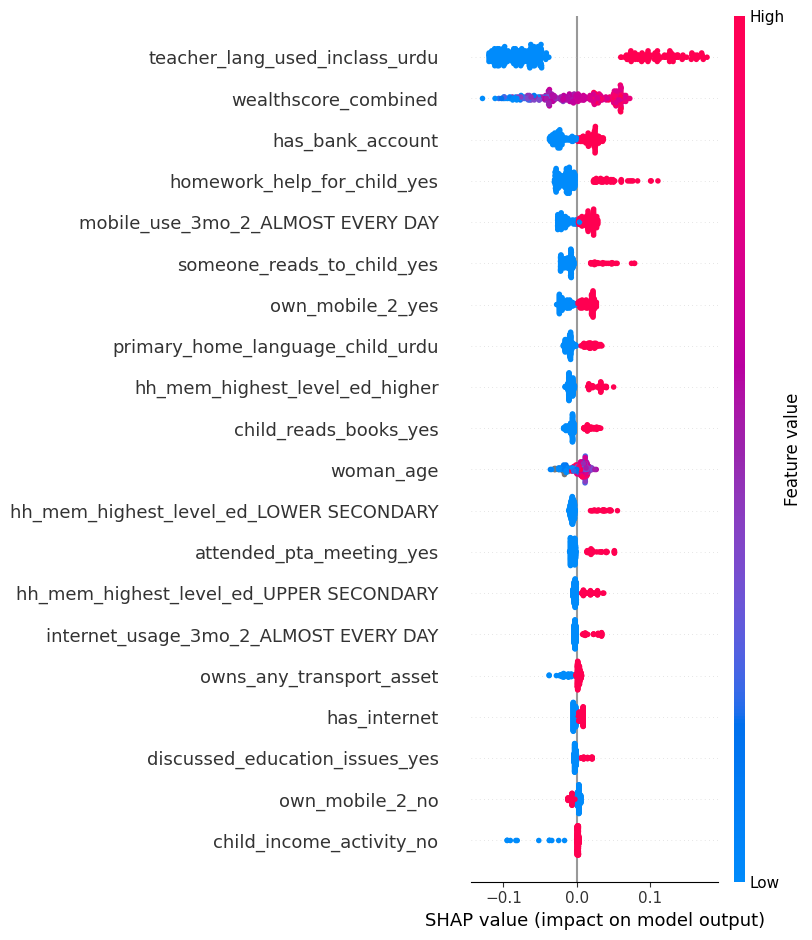

<Figure size 640x480 with 0 Axes>

In [322]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Create a subset of your test data for visualization
# -------------------------------
# Use the first 300 samples for faster plotting.
X_test_subset = X_test.iloc[:300]

# -------------------------------
# 2. Initialize the Explainer using the universal SHAP Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)

# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  # Expected: (820, n_features, n_classes)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  # Expected: (820, n_features)

# -------------------------------
# 5. Subset the SHAP values to match the subset of test data
# -------------------------------
shap_values_subset = shap_values_class1[:300, :]
print("Subset SHAP values shape:", shap_values_subset.shape)  # Expected: (300, n_features)

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the subset
# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class, subset to 300 samples
    X_test_subset,              # Subset of test data for visualization
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()


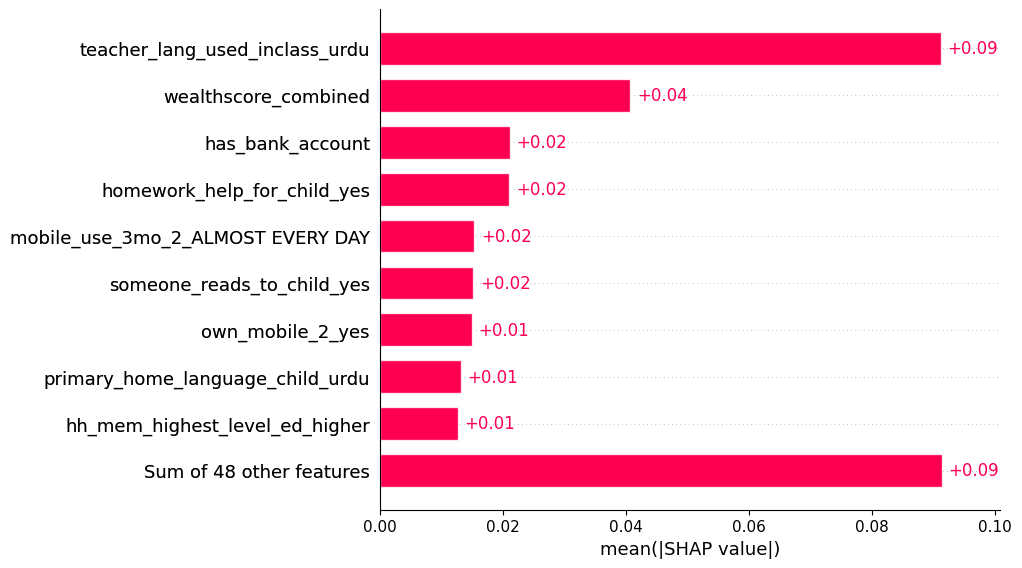

<Figure size 640x480 with 0 Axes>

In [323]:
shap_values_exp = shap.Explanation(
    values=shap_values_subset,
    base_values=explainer.expected_value[1],
    data=X_test_subset,
    feature_names=X_train.columns.to_list()
)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
shap.plots.bar(shap_values_exp)

plt.savefig('shap_bar_plot.png', dpi=150, bbox_inches='tight')  # Save the plot
plt.show()

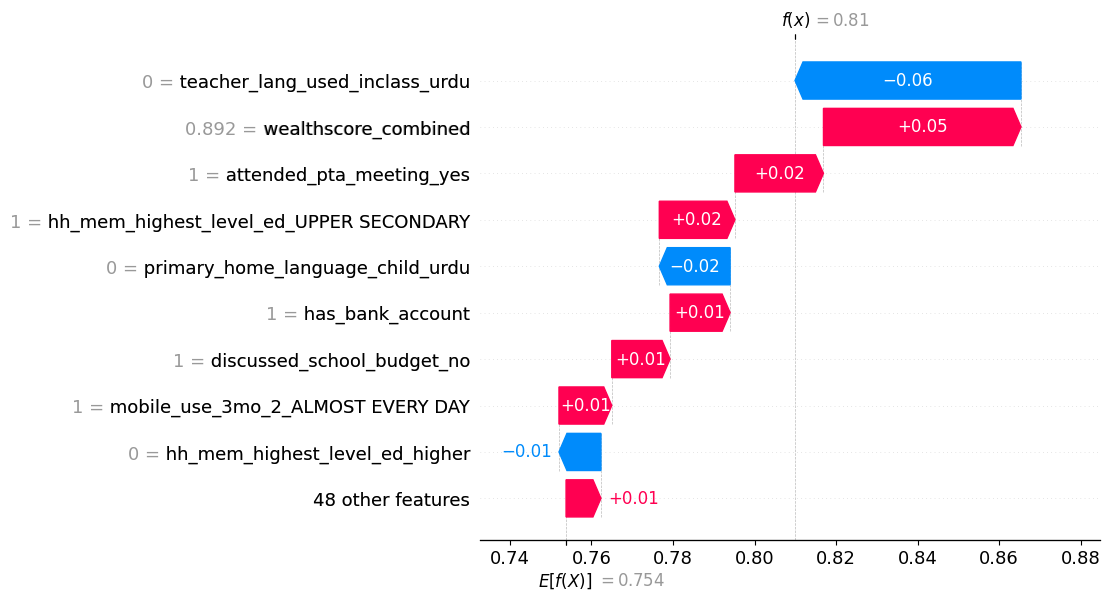

<Figure size 640x480 with 0 Axes>

In [324]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_subset[0],  # SHAP values for the first instance
        base_values=explainer.expected_value[1],  # Expected model output for class 1
        data=X_test_subset.iloc[0],  # Feature values for the first instance
        feature_names=X_train.columns.to_list()
    )
)
plt.savefig('shap_waterfall_plot.png', dpi=150)
plt.show()

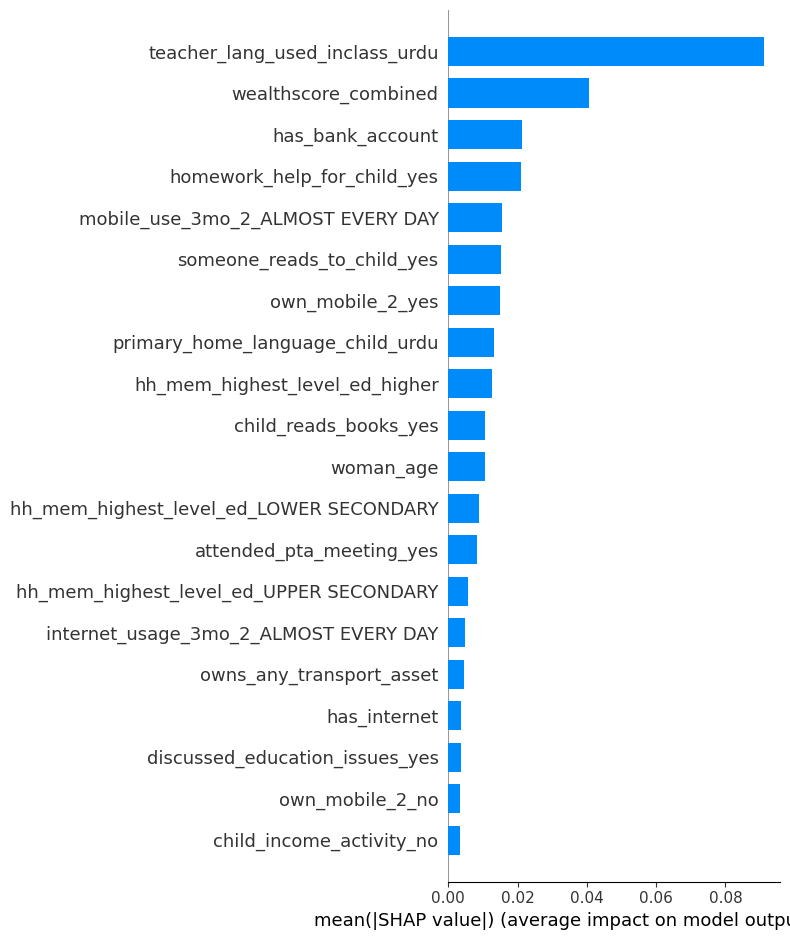

<Figure size 640x480 with 0 Axes>

In [325]:
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values_subset,
    X_test_subset,
    feature_names=X_train.columns,
    plot_type="bar"
)
plt.tight_layout()
plt.savefig('shap_feature_importance_bar.png', dpi=150)
plt.show()

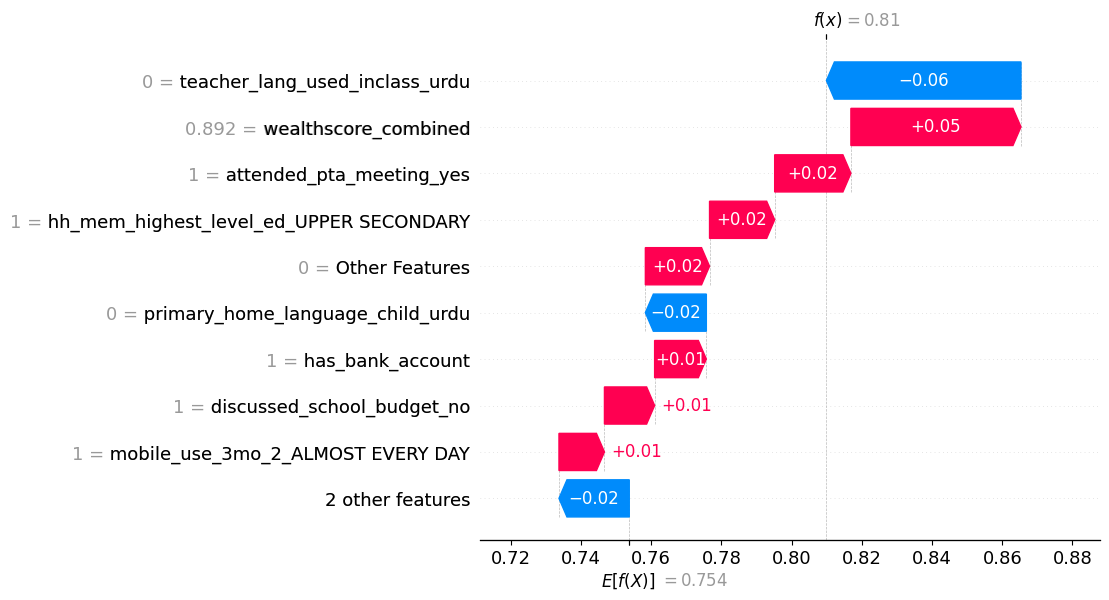

<Figure size 640x480 with 0 Axes>

In [326]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Number of top features to show in the waterfall plot
top_n = 10

# Extract SHAP values for the first sample
shap_vals = shap_values_subset[0]
feature_names = X_train.columns.to_list()
base_value = explainer.expected_value[1]

# Sort SHAP values by absolute importance
sorted_indices = np.argsort(np.abs(shap_vals))[::-1]  # Descending order
shap_vals_sorted = shap_vals[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]
feature_values_sorted = X_test_subset.iloc[0, sorted_indices]

# Keep only top N features, sum the rest into "Other Features"
if len(shap_vals_sorted) > top_n:
    other_features_sum = np.sum(shap_vals_sorted[top_n:])
    shap_vals_trimmed = np.append(shap_vals_sorted[:top_n], other_features_sum)
    feature_names_trimmed = feature_names_sorted[:top_n] + ["Other Features"]
    feature_values_trimmed = np.append(feature_values_sorted[:top_n], 0)  # No specific value for "Other Features"
else:
    shap_vals_trimmed = shap_vals_sorted
    feature_names_trimmed = feature_names_sorted
    feature_values_trimmed = feature_values_sorted

# Create the SHAP Waterfall Plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_vals_trimmed,
        base_values=base_value,
        data=feature_values_trimmed,
        feature_names=feature_names_trimmed
    )
)

# Save the figure
plt.savefig('shap_waterfall_plot_modified.png', dpi=150)
plt.show()


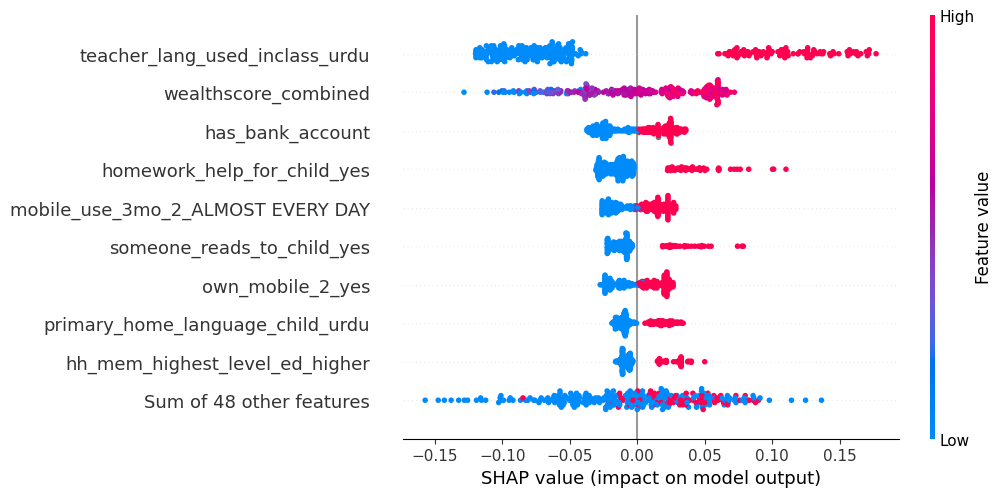

In [327]:
shap.plots.beeswarm(shap_values_exp)

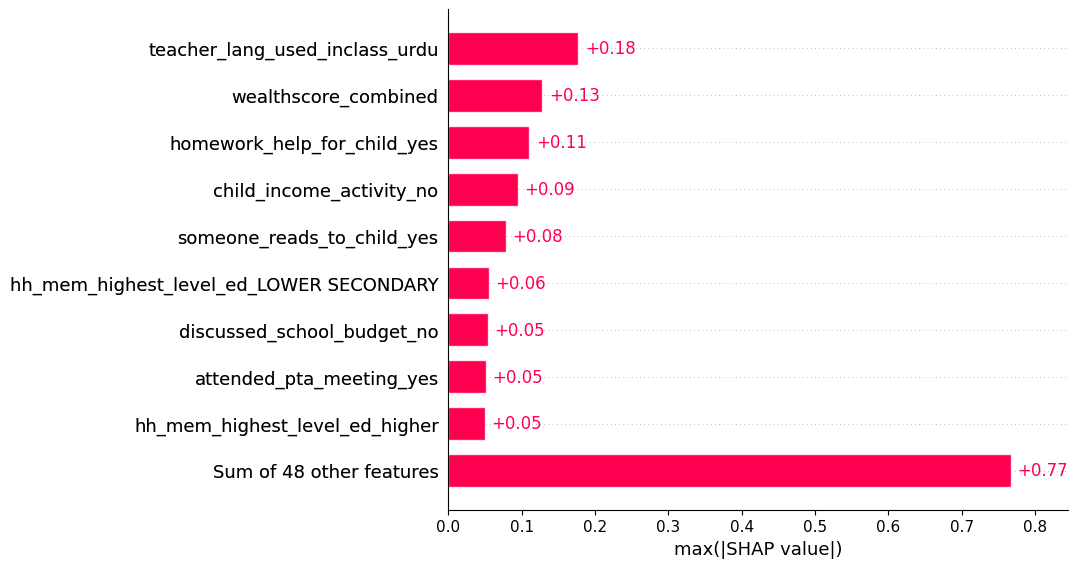

In [328]:
shap.plots.bar(shap_values_exp.abs.max(0))

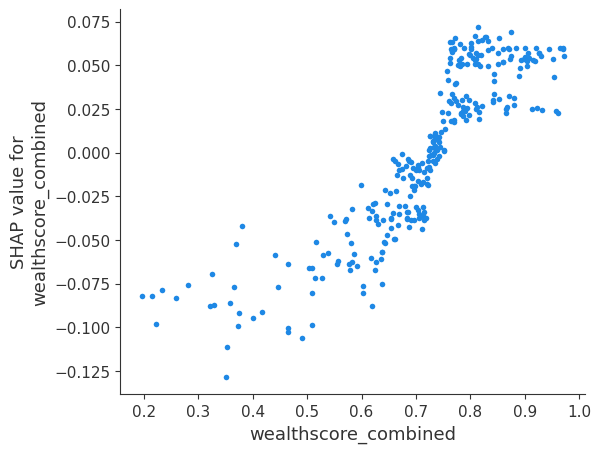

In [330]:
shap.dependence_plot(
    "wealthscore_combined",        # Feature name
    shap_values_subset,           # SHAP values for class 1
    X_test_subset,                # Subset of test data
    interaction_index=None        # Set to None to disable interaction highlighting
)


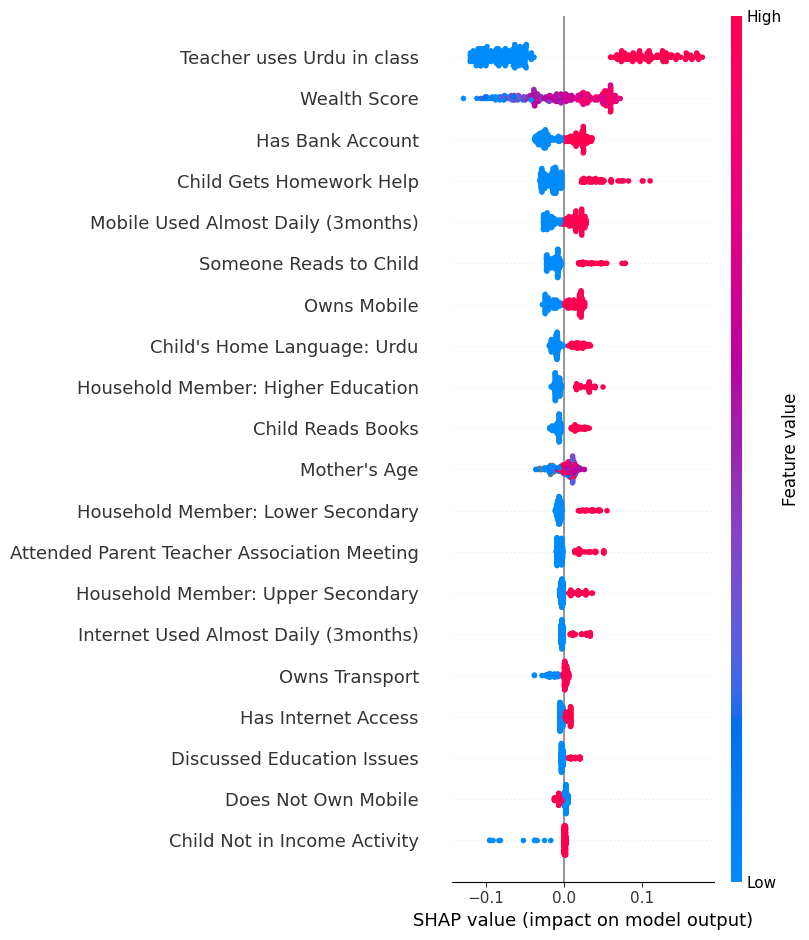

In [333]:
# Define readable names for SHAP plot
feature_name_map = {
    "teacher_lang_used_inclass_urdu": "Teacher uses Urdu in class",
    "wealthscore_combined": "Wealth Score",
    "has_bank_account": "Has Bank Account",
    "homework_help_for_child_yes": "Child Gets Homework Help",
    "mobile_use_3mo_2_ALMOST EVERY DAY": "Mobile Used Almost Daily (3months)",
    "someone_reads_to_child_yes": "Someone Reads to Child",
    "own_mobile_2_yes": "Owns Mobile",
    "primary_home_language_child_urdu": "Child's Home Language: Urdu",
    "hh_mem_highest_level_ed_higher": "Household Member: Higher Education",
    "child_reads_books_yes": "Child Reads Books",
    "woman_age": "Mother's Age",
    "hh_mem_highest_level_ed_LOWER SECONDARY": "Household Member: Lower Secondary",
    "attended_pta_meeting_yes": "Attended Parent Teacher Association Meeting",
    "hh_mem_highest_level_ed_UPPER SECONDARY": "Household Member: Upper Secondary",
    "internet_usage_3mo_2_ALMOST EVERY DAY": "Internet Used Almost Daily (3months)",
    "owns_any_transport_asset": "Owns Transport",
    "has_internet": "Has Internet Access",
    "discussed_education_issues_yes": "Discussed Education Issues",
    "own_mobile_2_no": "Does Not Own Mobile",
    "child_income_activity_no": "Child Not in Income Activity"
}

# Rename features in X_test_subset and X_train (if used)
X_test_subset_renamed = X_test_subset.rename(columns=feature_name_map)
X_train_renamed = X_train.rename(columns=feature_name_map)

# Generate SHAP summary plot with new labels
shap.summary_plot(
    shap_values_subset,
    X_test_subset_renamed,
    feature_names=X_train_renamed.columns
)
